# Problem 8

First, lets plot the data from the simulation with one particle for 50 $\mu$ s.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import numpy as np
import os

output_dir = os.path.join(os.getcwd(), '../output')
figure_dir = os.path.join(os.getcwd(), '/figures')

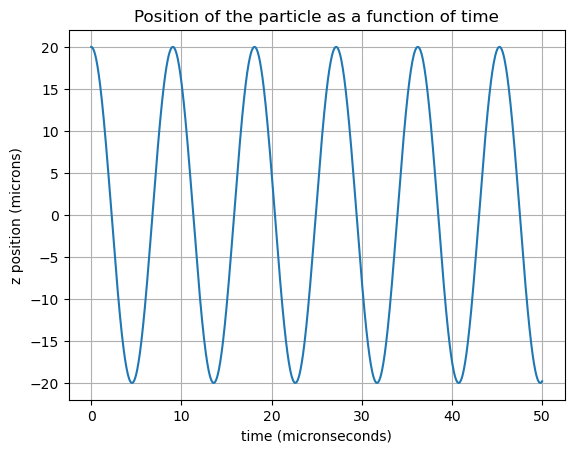

In [2]:
with open(os.path.join(output_dir, 'problem_8.out'), 'r') as f:
    lines = f.readlines()


for i, line in enumerate(lines):
    if "START **** 01" in line:
        start_idx = i
    if "END **** 01" in line:
        end_idx = i


df = pd.DataFrame([line.strip().split(",") for line in lines[start_idx+2:end_idx]])
df.columns = lines[start_idx+1].strip().split(",")
for col in df.columns:
    df[col] = df[col].astype(float)

plt.plot(df['t'], df['z'])
plt.xlabel('time (micronseconds)')
plt.ylabel('z position (microns)')
plt.title('Position of the particle as a function of time')
plt.grid(True)

Now we plot the simulation with two particles. Plot a) without interactions and plot b) with interactions

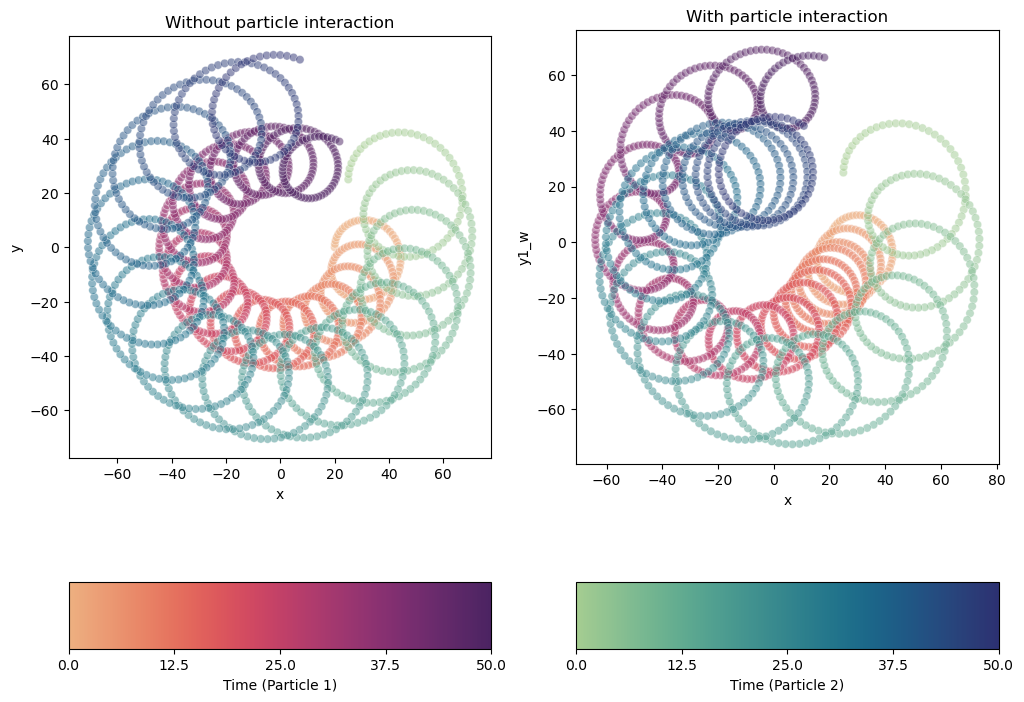

In [3]:
with open(os.path.join(output_dir, 'problem_8.out'), 'r') as f:
    lines = f.readlines()


for i, line in enumerate(lines):
    if "START **** 02" in line:
        start_idx = i
    if "END **** 02" in line:
        end_idx = i


df = pd.DataFrame([line.strip().split(",") for line in lines[start_idx+2:end_idx]])
df.columns = lines[start_idx+1].strip().split(",")
for col in df.columns:
    df[col] = df[col].astype(float)

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 10), 
                        gridspec_kw={'height_ratios': [10, 1, .5], 'hspace': 0.})

# Plot in the top two subplots
for i in range(2):
    axs[0, i].set_aspect('equal', adjustable='box')
    
    if i == 0:
        axs[0, i].set_title('Without particle interaction')
        sns.scatterplot(df, x='x1_wo', y='y1_wo', ax=axs[0, i], c=df['t'], alpha=0.5, cmap='flare', legend=False)
        sns.scatterplot(df, x='x2_wo', y='y2_wo', ax=axs[0, i], c=df['t'], alpha=0.5, cmap='crest', legend=False)
    else:
        axs[0, i].set_title('With particle interaction')
        sns.scatterplot(df, x='x1_w', y='y1_w', ax=axs[0, i], c=df['t'], alpha=0.5, cmap='flare', legend=False)
        sns.scatterplot(df, x='x2_w', y='y2_w', ax=axs[0, i], c=df['t'], alpha=0.5, cmap='crest', legend=False)
    
    axs[0, i].set_xlabel('x')
    if i == 0:
        axs[0, i].set_ylabel('y')

# Create colorbars
norm = plt.Normalize(df['t'].min(), df['t'].max())
sm1 = plt.cm.ScalarMappable(cmap='flare', norm=norm)
sm2 = plt.cm.ScalarMappable(cmap='crest', norm=norm)

cbar1 = fig.colorbar(sm1, cax=axs[1, 0], orientation='horizontal')
cbar2 = fig.colorbar(sm2, cax=axs[1, 1], orientation='horizontal')

# Set labels and ticks for colorbars
cbar1.set_label('Time (Particle 1)')
cbar2.set_label('Time (Particle 2)')

ticks = np.linspace(df['t'].min(), df['t'].max(), 5)
cbar1.set_ticks(ticks)
cbar2.set_ticks(ticks)

# Remove unused axes
axs[2, 0].remove()
axs[2, 1].remove()

#plt.tight_layout()
plt.show()

In [4]:
df

,t,x1_w,y1_w,z1_w,v_x1_w,v_y1_w,v_z1_w,x2_w,y2_w,z2_w,...,z1_wo,v_x1_wo,v_y1_wo,v_z1_wo,x2_wo,y2_wo,z2_wo,v_x2_wo,v_y2_wo,v_z2_wo
0,0.00,20.000000,0.000000,20.000000,0.000000,25.000000,0.000000,25.000000,25.000000,0.000000,...,20.000000,0.000000,25.000000,0.000000,25.000000,25.000000,0.000000,0.000000,40.000000,5.000000
1,0.05,20.080417,1.243720,19.990465,3.210694,24.687167,-0.382255,25.128831,27.005727,0.247447,...,19.987962,3.243312,24.812066,-0.481464,25.128075,27.002583,0.249950,5.123319,40.004652,4.996991
2,0.10,20.320113,2.462591,19.961693,6.364053,24.007196,-0.769403,25.515296,29.002982,0.489769,...,19.951863,6.443424,24.250755,-0.962349,25.511799,28.990596,0.499599,10.214638,39.417800,4.987966
3,0.15,20.715162,3.638470,19.913451,9.417881,22.969427,-1.160955,26.156796,30.961985,0.726942,...,19.891747,9.557707,23.323505,-1.442075,26.147874,30.934620,0.748646,15.206185,38.247033,4.972937
4,0.20,21.259560,4.753798,19.845534,12.331363,21.587926,-1.556321,27.047342,32.853440,0.958944,...,19.807685,12.544670,22.042604,-1.920066,27.029644,32.805812,0.996793,20.031510,36.507677,4.951921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,49.80,10.464475,66.843509,-20.072510,38.040690,4.872886,1.127034,2.718327,44.834197,0.065403,...,-19.999990,31.337036,-2.575620,0.013709,-2.555181,70.901618,-0.007117,50.089363,1.415504,-4.999998
997,49.85,12.381969,66.995416,-20.007041,38.588856,1.193035,1.492072,4.864550,44.413031,-0.237289,...,-19.987267,31.028768,-5.843692,0.495165,-0.052168,70.842986,-0.257063,49.932500,-3.757771,-4.996817
998,49.90,14.316280,66.962174,-19.923268,38.712676,-2.525038,1.859202,6.946594,43.757191,-0.533914,...,-19.950483,30.348659,-9.055718,0.976025,2.428219,70.526712,-0.506699,49.185314,-8.878826,-4.987621
999,49.95,16.246134,66.743081,-19.821082,38.410806,-6.232954,2.228608,8.938043,42.875549,-0.824326,...,-19.889684,29.305608,-12.169351,1.455710,4.856679,69.957100,-0.755725,47.857717,-13.880189,-4.972421


/tmp/ipykernel_75091/786874315.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


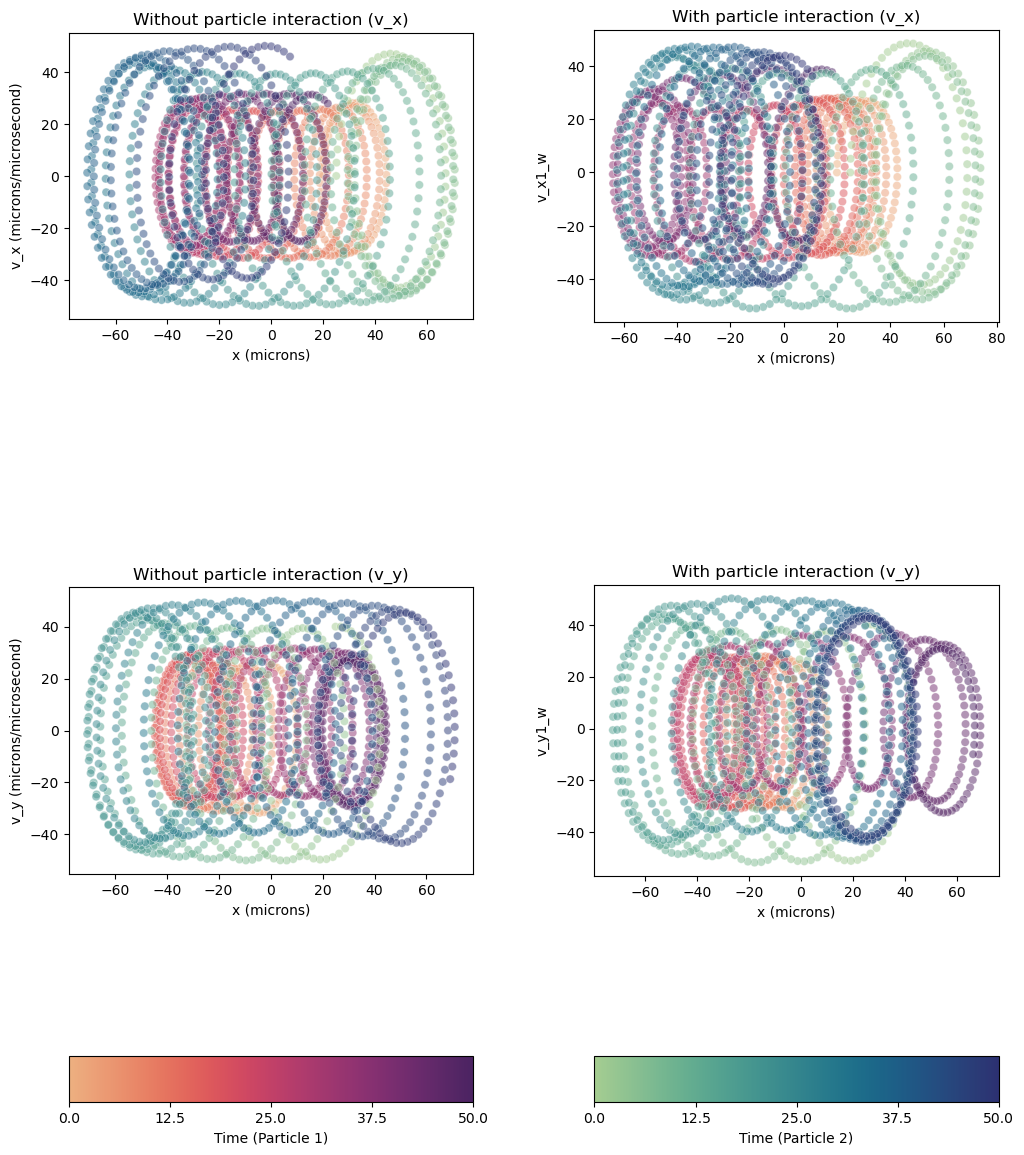

In [5]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 15), 
                        gridspec_kw={'height_ratios': [1, 1, 0.1], 'hspace': 0.3, 'wspace': 0.3})

# Plot v_x in the top row
for i in range(2):
    axs[0, i].set_aspect('equal', adjustable='box')
    
    if i == 0:
        axs[0, i].set_title('Without particle interaction (v_x)')
        sns.scatterplot(df, x='x1_wo', y='v_x1_wo', ax=axs[0, i], c=df['t'], alpha=0.5, cmap='flare', legend=False)
        sns.scatterplot(df, x='x2_wo', y='v_x2_wo', ax=axs[0, i], c=df['t'], alpha=0.5, cmap='crest', legend=False)
    else:
        axs[0, i].set_title('With particle interaction (v_x)')
        sns.scatterplot(df, x='x1_w', y='v_x1_w', ax=axs[0, i], c=df['t'], alpha=0.5, cmap='flare', legend=False)
        sns.scatterplot(df, x='x2_w', y='v_x2_w', ax=axs[0, i], c=df['t'], alpha=0.5, cmap='crest', legend=False)
    
    axs[0, i].set_xlabel('x (microns)')
    if i == 0:
        axs[0, i].set_ylabel('v_x (microns/microsecond)')

# Plot v_y in the second row
for i in range(2):
    axs[1, i].set_aspect('equal', adjustable='box')
    
    if i == 0:
        axs[1, i].set_title('Without particle interaction (v_y)')
        sns.scatterplot(df, x='y1_wo', y='v_y1_wo', ax=axs[1, i], c=df['t'], alpha=0.5, cmap='flare', legend=False)
        sns.scatterplot(df, x='y2_wo', y='v_y2_wo', ax=axs[1, i], c=df['t'], alpha=0.5, cmap='crest', legend=False)
    else:
        axs[1, i].set_title('With particle interaction (v_y)')
        sns.scatterplot(df, x='y1_w', y='v_y1_w', ax=axs[1, i], c=df['t'], alpha=0.5, cmap='flare', legend=False)
        sns.scatterplot(df, x='y2_w', y='v_y2_w', ax=axs[1, i], c=df['t'], alpha=0.5, cmap='crest', legend=False)
    
    axs[1, i].set_xlabel('x (microns)')
    if i == 0:
        axs[1, i].set_ylabel('v_y (microns/microsecond)')

# Create colorbars
norm = plt.Normalize(df['t'].min(), df['t'].max())
sm1 = plt.cm.ScalarMappable(cmap='flare', norm=norm)
sm2 = plt.cm.ScalarMappable(cmap='crest', norm=norm)

cbar1 = fig.colorbar(sm1, cax=axs[2, 0], orientation='horizontal')
cbar2 = fig.colorbar(sm2, cax=axs[2, 1], orientation='horizontal')

# Set labels and ticks for colorbars
cbar1.set_label('Time (Particle 1)')
cbar2.set_label('Time (Particle 2)')

ticks = np.linspace(df['t'].min(), df['t'].max(), 5)
cbar1.set_ticks(ticks)
cbar2.set_ticks(ticks)

plt.tight_layout()
plt.show()


Now we plot 3d plots

/tmp/ipykernel_75091/445967273.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


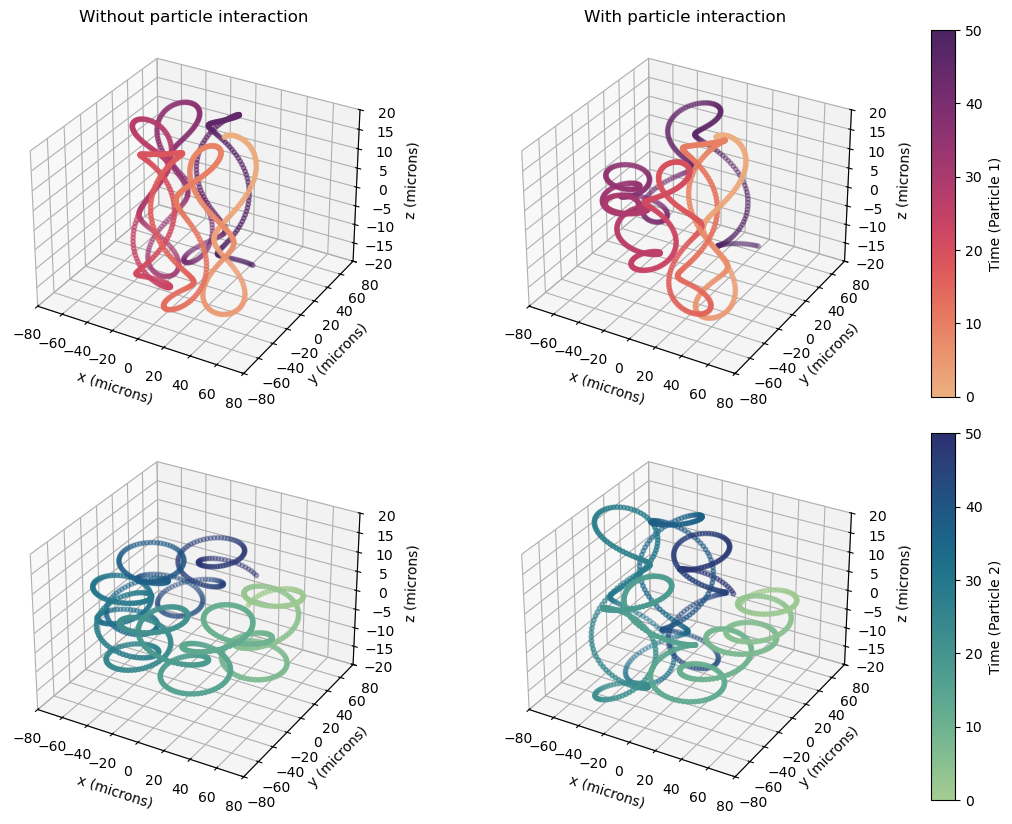

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(13, 10))
gs = fig.add_gridspec(2, 3, width_ratios=[1, 1, 0.05], height_ratios=[1, 1], 
                      hspace=0.1, wspace=0.)

axs = [[fig.add_subplot(gs[i, j], projection='3d') for j in range(2)] for i in range(2)]
cax1 = fig.add_subplot(gs[0, 2])
cax2 = fig.add_subplot(gs[1, 2])

sc1 = axs[0][0].scatter(df['x1_wo'], df['y1_wo'], df['z1_wo'], c=df['t'], cmap='flare', s=10)
sc2 = axs[0][1].scatter(df['x1_w'], df['y1_w'], df['z1_w'], c=df['t'], cmap='flare', s=10)
sc3 = axs[1][0].scatter(df['x2_wo'], df['y2_wo'], df['z2_wo'], c=df['t'], cmap='crest', s=10)
sc4 = axs[1][1].scatter(df['x2_w'], df['y2_w'], df['z2_w'], c=df['t'], cmap='crest', s=10)

for row in range(2):
    for col in range(2):
        ax = axs[row][col]
        ax.set_xlabel('x (microns)')
        ax.set_ylabel('y (microns)')
        ax.set_zlabel('z (microns)')
        ax.set_xlim(-80, 80)
        ax.set_ylim(-80, 80)
        ax.set_zlim(-20, 20)
        if row == 0:
            if col == 0:
                ax.set_title('Without particle interaction')
            else:
                ax.set_title('With particle interaction')

plt.colorbar(sc1, cax=cax1, label='Time (Particle 1)')
plt.colorbar(sc3, cax=cax2, label='Time (Particle 2)')
plt.tight_layout()
plt.show()


In [7]:
with open(os.path.join(output_dir, 'problem_8.out'), 'r') as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if "START **** 03" in line:
        start_idx = i
    if "END **** 03" in line:
        end_idx = i
for i, line in enumerate(lines[start_idx:end_idx]):
    if "n_steps: 4000" in line:
        start_idx_4000 = start_idx+i+1
    if "n_steps: 8000" in line:
        start_idx_8000 = start_idx+i+1
        end_idx_4000 = start_idx+i
    if "n_steps: 16000" in line:
        start_idx_16000 = start_idx+i+1
        end_idx_8000 = start_idx+i
    if "n_steps: 32000" in line:
        start_idx_32000 = start_idx+i+1
        end_idx_16000 = start_idx+i
    end_idx_32000 = end_idx

dfs = {
    4000: {'start_idx': start_idx_4000, 'end_idx': end_idx_4000},
    8000: {'start_idx': start_idx_8000, 'end_idx': end_idx_8000},
    16000: {'start_idx': start_idx_16000, 'end_idx': end_idx_16000},
    32000: {'start_idx': start_idx_32000, 'end_idx': end_idx_32000}
}
for key, value in dfs.items():
    df = pd.DataFrame([line.strip().split(",") for line in lines[value['start_idx']+1:value['end_idx']]])
    df.columns = lines[value['start_idx']].strip().split(",")
    for col in df.columns:
        df[col] = df[col].astype(float)
    dfs[key]['df'] = df

dfs[4000]['df']

,t,x_rk4,y_rk4,z_rk4,x_fe,y_fe,z_fe
0,0.0000,25.000000,25.000000,0.000000,25.000000,25.000000,0.000000
1,0.0125,25.007999,25.500393,0.062499,25.015989,25.500940,0.062500
2,0.0250,25.032007,26.001264,0.124994,25.047997,26.002359,0.124995
3,0.0375,25.072034,26.502150,0.187479,25.096038,26.503793,0.187481
4,0.0500,25.128074,27.002586,0.249950,25.160116,27.004778,0.249953
...,...,...,...,...,...,...,...
3996,49.9500,4.859860,69.956380,-0.755728,36.103064,164.276514,-0.756513
3997,49.9625,5.455467,69.775125,-0.817854,39.430850,163.223026,-0.818640
3998,49.9750,6.045594,69.578649,-0.879918,42.728412,162.075520,-0.880704
3999,49.9875,6.629808,69.367118,-0.941917,45.993044,160.834863,-0.942702


In [8]:
from specific_solution import *

for n_steps in [4000, 8000, 16000, 32000]:
    df = dfs[n_steps]['df']
    t_vec, x_vec, y_vec, z_vec = simulate_specific_solution(n_steps)

    print(sum(df['t'].values-t_vec))


0.0
0.0
0.0
0.0


In [9]:
50/32000

0.0015625

now we add the exact solution as columns

In [10]:
from specific_solution import *

for n_steps, value in dfs.items():
    t_vec, x_vec, y_vec, z_vec = simulate_specific_solution(n_steps)
    df = value['df']
    df['x_real'] = x_vec
    df['y_real'] = y_vec
    df['z_real'] = z_vec
    value['df'] = df  

dfs[4000]['df']

,t,x_rk4,y_rk4,z_rk4,x_fe,y_fe,z_fe,x_real,y_real,z_real
0,0.0000,25.000000,25.000000,0.000000,25.000000,25.000000,0.000000,20.000000,0.000000,20.000000
1,0.0125,25.007999,25.500393,0.062499,25.015989,25.500940,0.062500,20.005079,0.312451,19.999248
2,0.0250,25.032007,26.001264,0.124994,25.047997,26.002359,0.124995,20.020310,0.624608,19.996990
3,0.0375,25.072034,26.502150,0.187479,25.096038,26.503793,0.187481,20.045682,0.936178,19.993228
4,0.0500,25.128074,27.002586,0.249950,25.160116,27.004778,0.249953,20.081173,1.246866,19.987962
...,...,...,...,...,...,...,...,...,...,...
3996,49.9500,4.859860,69.956380,-0.755728,36.103064,164.276514,-0.756513,20.329492,39.660948,-19.889683
3997,49.9625,5.455467,69.775125,-0.817854,39.430850,163.223026,-0.818640,20.693842,39.504026,-19.870739
3998,49.9750,6.045594,69.578649,-0.879918,42.728412,162.075520,-0.880704,21.054106,39.337685,-19.850299
3999,49.9875,6.629808,69.367118,-0.941917,45.993044,160.834863,-0.942702,21.410015,39.162046,-19.828366


In [29]:
def f_del_max(df, method):
    # Calculate the difference vectors for each row
    df['dx'] = df['x_real'] - df[f'x_{method}']
    df['dy'] = df['y_real'] - df[f'y_{method}']
    df['dz'] = df['z_real'] - df[f'z_{method}']

    # Calculate the magnitude of the difference vector for each row
    df['diff_magnitude'] = np.sqrt(df['dx']**2 + df['dy']**2 + df['dz']**2)

    # Find the maximum difference magnitude
    del_max = df['diff_magnitude'].max()
    return del_max

def estimate_error_convergence_rate(dfs):
    for n_steps in dfs.keys():
        h = 50 / n_steps
        dfs[n_steps]['h'] = h
        dfs[n_steps]['del_max_rk4'] = f_del_max(dfs[n_steps]['df'], 'rk4')
        dfs[n_steps]['del_max_fe'] = f_del_max(dfs[n_steps]['df'], 'fe')
    
    n_steps_vec = [4000, 8000, 16000, 32000]
    for method in ['rk4', 'fe']:
        s = 0
        for k in [1, 2, 3]:

            numerator = np.log(dfs[n_steps_vec[k]][f'del_max_{method}'] / dfs[n_steps_vec[k-1]][f'del_max_{method}'])
            denominator = np.log(dfs[n_steps_vec[k]]['h'] / dfs[n_steps_vec[k-1]]['h'])
            s_k = numerator / denominator
            s += s_k
        r_err = 1/3 * s

        print(f"Error convergence rate for {method} is {r_err}")


estimate_error_convergence_rate(dfs)

Error convergence rate for rk4 is -0.37611524076206404
Error convergence rate for fe is -0.7549040897360425


4000
8000
16000
32000


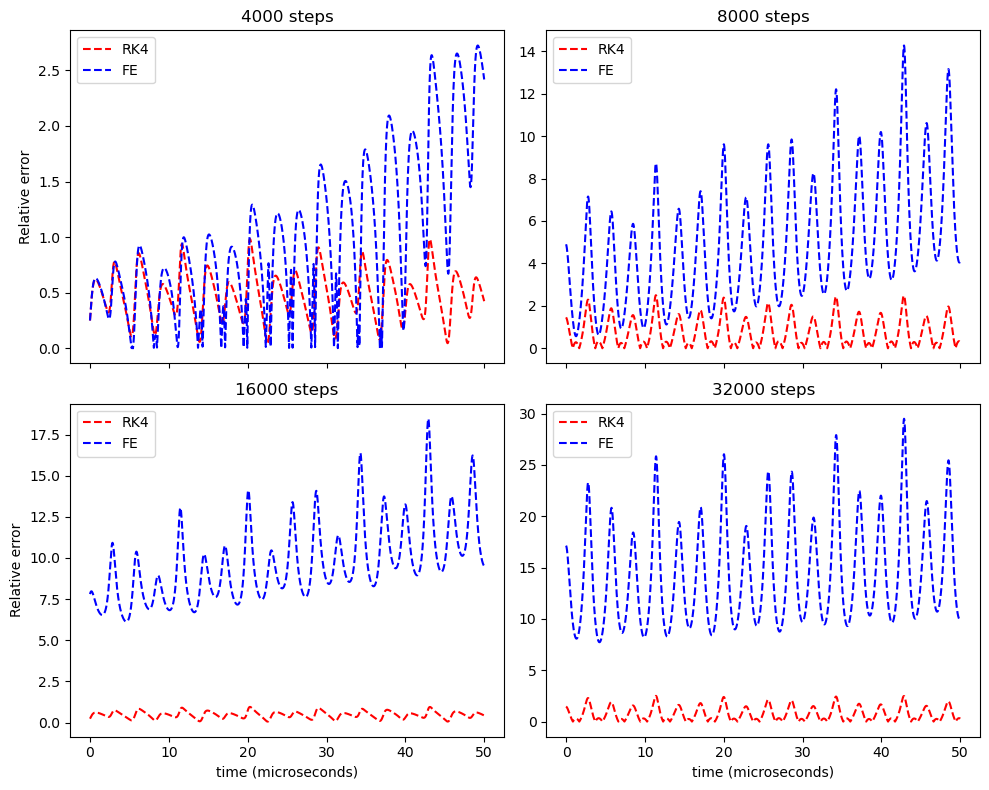

In [30]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 8), sharex=True)

axs = axs.flatten()

for indx, (n_steps, value) in enumerate(dfs.items()):
    df = value['df']
    print(n_steps)
    ax = axs[indx]

    rk4_norm = np.sqrt(df['x_rk4']**2 + df['y_rk4']**2 + df['z_rk4']**2)
    fe_norm = np.sqrt(df['x_fe']**2 + df['y_fe']**2 + df['z_fe']**2)
    real_norm = np.sqrt(df['x_real']**2 + df['y_real']**2 + df['z_real']**2)

    # Calculate the relative error
    relative_error_rk4 = np.abs(rk4_norm - real_norm) / real_norm
    relative_error_fe = np.abs(fe_norm - real_norm) / real_norm


    ax.plot(df['t'], relative_error_rk4, color='red', linestyle='dashed', label='RK4')
    ax.plot(df['t'], relative_error_fe, color='blue', linestyle='dashed', label='FE')

    ax.set_title(f'{n_steps} steps')
    if indx == 0 or indx == 2:
        ax.set_ylabel('Relative error')
    if indx == 2 or indx == 3:
        ax.set_xlabel('time (microseconds)')
    
    ax.legend()

plt.tight_layout()
plt.show()